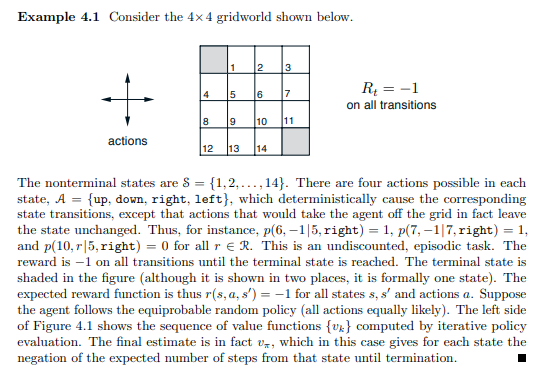

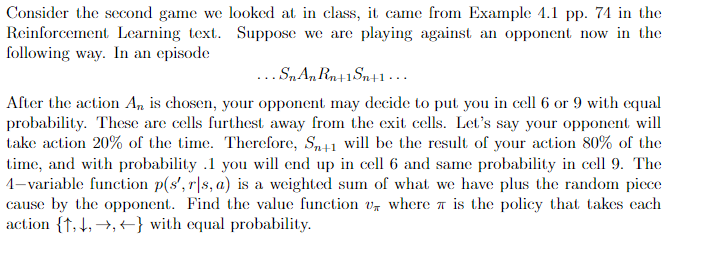

In [7]:
import numpy as np

rows, cols = 4, 4

# Define terminal states
terminal_positions = [(0,0), (3,3)]
def is_terminal(r, c):
    return (r, c) in terminal_positions

# Assign state numbers to nonterminal states
nonterminal_states = []
pos_to_state = {}
state_to_pos = {}
current_state_num = 1
for r in range(rows):
    for c in range(cols):
        if not is_terminal(r, c):
            pos_to_state[(r,c)] = current_state_num
            state_to_pos[current_state_num] = (r,c)
            nonterminal_states.append(current_state_num)
            current_state_num += 1

# Actions: Up, Down, Left, Right
actions = [(-1,0), (1,0), (0,-1), (0,1)]

def next_state(r, c, action):
    """Given a state (r,c) and an action, return the next (r',c') under normal transitions.
       If going off-grid, remain in the same cell.
       If terminal is reached, return None."""
    dr, dc = action
    nr, nc = r + dr, c + dc
    # Check boundaries
    if nr < 0 or nr >= rows or nc < 0 or nc >= cols:
        nr, nc = r, c
    if is_terminal(nr, nc):
        return None
    return (nr, nc)

# Create the transition matrix and reward vector
num_states = 14
P = np.zeros((num_states, num_states))
r_vector = np.full(num_states, -1.0)  # reward is -1 for all steps until terminal

def s_index(s):
    return s - 1

# Fill in the transition probabilities
for s in nonterminal_states:
    (r, c) = state_to_pos[s]

    # Opponent interference: 0.1 to state 6, 0.1 to state 9
    # (Ensure that states 6 and 9 exist in our nonterminal states)
    if 6 in nonterminal_states:
        P[s_index(s), s_index(6)] += 0.1
    if 9 in nonterminal_states:
        P[s_index(s), s_index(9)] += 0.1

    # Normal transitions: each action chosen with 0.25 probability, times 0.8 = 0.2 per action
    for action in actions:
        next_pos = next_state(r, c, action)
        if next_pos is not None:
            s_next = pos_to_state[next_pos]
            P[s_index(s), s_index(s_next)] += 0.2

# Solve the linear system (I - P)v = r
I = np.eye(num_states)
A = I - P
b = r_vector
v = np.linalg.solve(A, b)

# Construct the 4x4 matrix of values
# Terminal states = 0, others = their computed values.
V_matrix = np.zeros((rows, cols))
for r in range(rows):
    for c in range(cols):
        if is_terminal(r, c):
            V_matrix[r, c] = 0.0
        else:
            s = pos_to_state[(r,c)]
            V_matrix[r, c] = v[s_index(s)]

print("Value Function (4x4) with terminal states at (0,0) and (3,3):")
print(V_matrix)


Value Function (4x4) with terminal states at (0,0) and (3,3):
[[  0.         -26.07142857 -33.57142857 -35.35714286]
 [-26.07142857 -31.78571429 -33.92857143 -33.57142857]
 [-33.57142857 -33.92857143 -31.78571429 -26.07142857]
 [-35.35714286 -33.57142857 -26.07142857   0.        ]]
